In [2]:
import os
if os.path.basename(os.getcwd())=='experiments':
    os.chdir("./..")

In [3]:
from utils.data_preparation import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**About this file**
Number of customers: 105,508  
Number of products: 5,850  
Number of transactions: 192,544  
**Field Description:**
- item_id: unique product id
- weight: weight measurement of customer
- rented for: purpose clothing was rented for
- body type: body type of customer
- review_text: review given by the customer
- review_summary: summary of the review
- size: the standardized size of the product
- rating: rating for the product
- age: age of the customer
- category: the category of the product
- bust size: bust measurement of customer
- height: height of the customer
- fit: fit feedback
- user_id: a unique id for the customer
- review_date: date when the review was written

Fields summary:
- User_data: user_id, weight, body_type, age, bust_size, height
- Product_data: item_id, category
- Transaction_data: size, rented_for, review_text, review_summary, rating, fit, review_date

## Original Data

In [4]:
df = load_original_data()
df

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,66386,34dd,2252812,140lbs,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,"5' 9""",8,42.0,"May 18, 2016"
192540,fit,118398,32c,682043,100lbs,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,"5' 1""",4,29.0,"September 30, 2016"
192541,fit,47002,36a,683251,135lbs,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,"5' 8""",8,31.0,"March 4, 2016"
192542,fit,961120,36c,126335,165lbs,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,"5' 6""",16,31.0,"November 25, 2015"


## Preprocessed data  
For my purposes I'll be using following columns:
- item_id
- user_id
- size
- category
- fit - renamed as result

User and item ids range from 0 to number of users/items - 1

In [5]:
df = get_processed_renttherunway_data()
df

,result_original,user_id_original,item_id_original,size,review_date,category,user_id,item_id,result
0,fit,420272,2260466,14,"April 20, 2016",romper,44334,4396,0
1,fit,273551,153475,12,"June 18, 2013",gown,28835,65,0
2,fit,360448,1063761,4,"December 14, 2015",sheath,37976,1945,0
3,fit,909926,126335,8,"February 12, 2014",dress,96080,7,0
4,fit,151944,616682,12,"September 26, 2016",gown,15959,1032,0
...,...,...,...,...,...,...,...,...,...
192539,fit,66386,2252812,8,"May 18, 2016",jumpsuit,7026,4382,0
192540,fit,118398,682043,4,"September 30, 2016",dress,12494,1164,0
192541,fit,47002,683251,8,"March 4, 2016",dress,5019,1166,0
192542,fit,961120,126335,16,"November 25, 2015",dress,101534,7,0


#### Mean size

In [6]:
print("Size stats: ")
df["size"].describe()

Size stats: 


count    192544.000000
mean         12.245175
std           8.494877
min           0.000000
25%           8.000000
50%          12.000000
75%          16.000000
max          58.000000
Name: size, dtype: float64

In [7]:
df.groupby("category")["size"].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ballgown,16.0,25.437500,12.914946,4.0,19.00,24.5,29.75,54.0
blazer,782.0,10.543478,6.474813,1.0,4.00,8.0,16.00,28.0
blouse,651.0,11.328725,5.956722,1.0,8.00,12.0,14.00,28.0
blouson,14.0,10.000000,8.357401,1.0,1.75,8.0,19.00,24.0
bomber,128.0,11.382812,5.926214,1.0,8.00,12.0,14.00,26.0
...,...,...,...,...,...,...,...,...
trouser,55.0,13.145455,6.931993,1.0,8.00,16.0,20.00,24.0
trousers,18.0,14.666667,3.880570,8.0,12.00,14.0,16.00,24.0
tunic,162.0,10.382716,5.418092,1.0,8.00,8.0,14.00,24.0


<AxesSubplot:xlabel='category'>

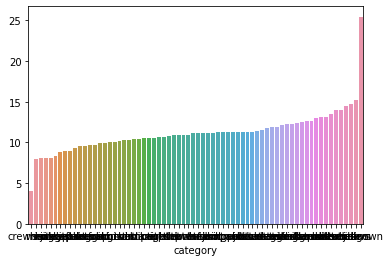

In [8]:
mean_size_per_category = df.groupby("category")["size"].mean().sort_values()
sns.barplot(x=mean_size_per_category.index, y=mean_size_per_category.values)
#mean_size_per_category

## Size range  
How many times a certain size was bought?  
How many sizes of a product were seen?

<AxesSubplot:>

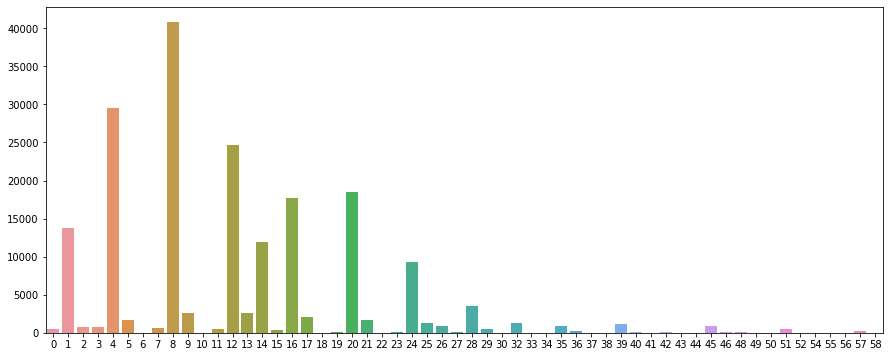

In [9]:
size_counts = df["size"].value_counts().sort_index()
plt.figure(figsize=(15,6))
sns.barplot(x=size_counts.index, y=size_counts.values)

In [10]:
size_range = df.groupby("item_id")["size"].nunique().value_counts().sort_index()
size_range_cumulative = np.cumsum(size_range)
size_range

1      446
2      579
3      741
4     1279
5      637
6      506
7      787
8      293
9      112
10      89
11      67
12      70
13      44
14      37
15      22
16      26
17      16
18      19
19      14
20      13
21      12
22       8
23       2
24       7
25       6
26       4
27       2
28       1
29       2
31       2
32       1
33       2
36       1
37       1
39       2
Name: size, dtype: int64

<AxesSubplot:>

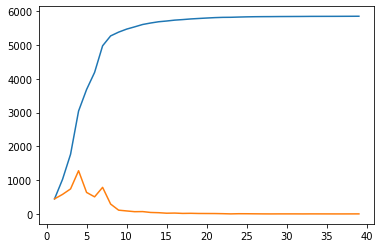

In [11]:
sns.lineplot(x=size_range_cumulative.index, y=size_range_cumulative.values)
sns.lineplot(x=size_range.index, y=size_range.values)

#### Transaction Counts

Per user

In [12]:
transaction_per_user = df.groupby("user_id")["item_id"].count()
transaction_per_user.describe()

count    105571.000000
mean          1.823834
std           3.074324
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         436.000000
Name: item_id, dtype: float64

Per product

In [13]:
transaction_per_item = df.groupby("item_id")["user_id"].count()
transaction_per_item.describe()

count    5850.000000
mean       32.913504
std        85.000916
min         1.000000
25%         5.000000
50%        14.000000
75%        32.000000
max      2241.000000
Name: user_id, dtype: float64

Per category

In [14]:
transaction_per_category = df.groupby("category")["user_id"].count()
transaction_per_category.describe()

count       68.000000
mean      2831.529412
std      12543.760602
min          1.000000
25%         14.000000
50%         66.500000
75%        432.500000
max      92884.000000
Name: user_id, dtype: float64

In [15]:
transaction_per_category.sort_values()

category
buttondown        1
crewneck          1
overcoat          2
sweatpants        2
caftan            4
              ...  
jumpsuit       5184
shift          5365
sheath        19316
gown          44381
dress         92884
Name: user_id, Length: 68, dtype: int64

#### Category vs result

In [16]:
categories_count = df["category"].value_counts().sort_values(ascending=False)
categories_count

dress           92884
gown            44381
sheath          19316
shift            5365
jumpsuit         5184
                ...  
sweatershirt        4
sweatpants          2
overcoat            2
buttondown          1
crewneck            1
Name: category, Length: 68, dtype: int64

In [17]:
corrMatrix = pd.crosstab(index=df["category"], columns=df["result"])
corrMatrix

result,0,1,2
category,,,
ballgown,10,5,1
blazer,595,117,70
blouse,484,107,60
blouson,11,2,1
bomber,94,14,20
...,...,...,...
trouser,35,6,14
trousers,13,0,5
tunic,104,53,5


In [18]:
corrMatrix_normalized = pd.crosstab(index=df["category"], columns=df["result"], normalize="index")
corrMatrix_normalized

result,0,1,2
category,,,
ballgown,0.625000,0.312500,0.062500
blazer,0.760870,0.149616,0.089514
blouse,0.743472,0.164363,0.092166
blouson,0.785714,0.142857,0.071429
bomber,0.734375,0.109375,0.156250
...,...,...,...
trouser,0.636364,0.109091,0.254545
trousers,0.722222,0.000000,0.277778
tunic,0.641975,0.327160,0.030864


<AxesSubplot:xlabel='result', ylabel='category'>

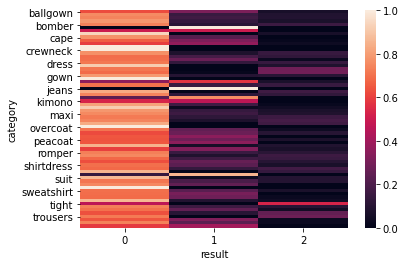

In [19]:
sns.heatmap(data = corrMatrix_normalized)

In [30]:
top_categories.index.values

array(['dress', 'gown', 'sheath', 'shift', 'jumpsuit', 'top', 'maxi',
       'romper', 'jacket', 'mini', 'skirt', 'sweater', 'coat', 'blazer',
       'shirtdress', 'blouse', 'down', 'pants', 'vest', 'shirt',
       'cardigan', 'frock', 'culottes', 'tank', 'tunic'], dtype=object)

In [36]:
top_categories = categories_count.head(25)
cropped_dataset = df[df["category"].isin(top_categories.index)]
top_categories

dress         92884
gown          44381
sheath        19316
shift          5365
jumpsuit       5184
top            4931
maxi           3443
romper         3070
jacket         2404
mini           1751
skirt          1531
sweater        1149
coat            980
blazer          782
shirtdress      729
blouse          651
down            464
pants           422
vest            278
shirt           277
cardigan        241
frock           205
culottes        188
tank            181
tunic           162
Name: category, dtype: int64

In [38]:
corrMatrix_normalized = pd.crosstab(index=cropped_dataset["category"], columns=cropped_dataset["result"], normalize="index")
corrMatrix_normalized

result,0,1,2
category,,,
blazer,0.760870,0.149616,0.089514
blouse,0.743472,0.164363,0.092166
cardigan,0.659751,0.323651,0.016598
coat,0.595918,0.367347,0.036735
culottes,0.691489,0.180851,0.127660
down,0.698276,0.271552,0.030172
dress,0.716668,0.135987,0.147345
frock,0.687805,0.019512,0.292683
gown,0.792614,0.100651,0.106735


<AxesSubplot:xlabel='result', ylabel='category'>

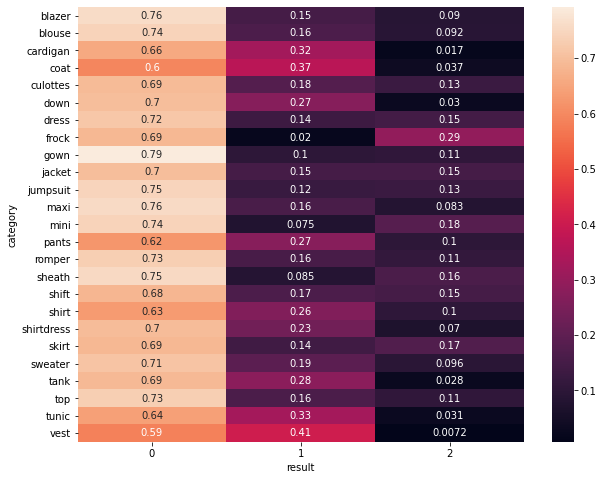

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(data = corrMatrix_normalized, annot=True)